In [2]:
# Numpy используется для работы с многомерными массивами
import numpy as np
# Pandas основная библиотека, которую мы будем использовать для предварительного анализа
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("star-dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'star-dataset.csv'

In [ ]:
# Выведем первые 10 обучающих образцов
data.head(10)

In [4]:
# Посмотрим на количество признаков и обучающих образцов:
data.shape

NameError: name 'data' is not defined

In [5]:
# Выведем все признаки
data.columns.values

NameError: name 'data' is not defined

In [6]:
data.isnull().sum()

NameError: name 'data' is not defined

In [7]:
# Правильно ли определились типы значений у признаков и есть ли пустые значения в датасете?
data.info()

NameError: name 'data' is not defined

In [8]:
# С помощью метода describe() можно узнать:
# 1.	среднее значение
# 2.	стандартное отклонение
# 3.	минимальное, максимальное значения
# 4.	медиану
# 5.	значения нижнего и верхнего квартилей

data.describe()

NameError: name 'data' is not defined

In [9]:
# Построим корреляционную матрицу:
data.corr()

NameError: name 'data' is not defined

NameError: name 'data' is not defined

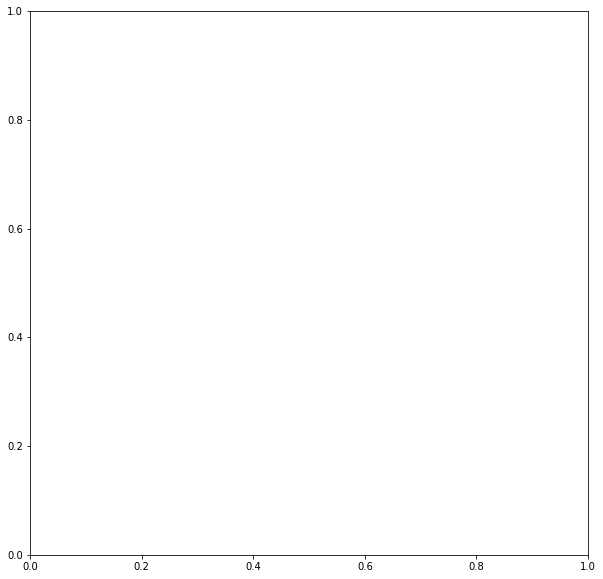

In [10]:
# библиотека на языке python для здания статистических графиков
import seaborn as sns
# библиотека на языке python для визуализации данных
import matplotlib.pyplot as plt
# Построим тепловую карту:
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), square=True)
plt.show()

In [ ]:
# Теперь мы можем посмотреть на корреляцию нашей целевой функции по отношению к другим признакам:
plt.figure(figsize=(12,6))
data.corr()['Star type'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
data1 = data['Star type'].value_counts()
data1

In [ ]:
data1.plot(kind = 'pie',figsize =(5,5), fontsize = 12)

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y="Star type", data=data, palette='husl');

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y="Spectral Class", data=data, palette='husl');

In [ ]:
sns.pairplot(data);

In [ ]:
#Нарисуем гистограммы распределения 
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# variables with the exponential distribution scaled logarithmically
data['Temperature (K)'] = np.log(data['Temperature (K)'])
data['Luminosity(L/Lo)'] = np.log(data['Luminosity(L/Lo)'])
data['Radius(R/Ro)'] = np.log(data['Radius(R/Ro)'])

# define the scaler
scaler = MinMaxScaler()

# variables now scaled with the minmax scaler
data['Temperature (K)'] = scaler.fit_transform(np.expand_dims(data['Temperature (K)'], axis=1))
data['Luminosity(L/Lo)'] = scaler.fit_transform(np.expand_dims(data['Luminosity(L/Lo)'], axis=1))
data['Radius(R/Ro)'] = scaler.fit_transform(np.expand_dims(data['Radius(R/Ro)'], axis=1))
data['Absolute magnitude(Mv)'] = scaler.fit_transform(np.expand_dims(data['Absolute magnitude(Mv)'], axis=1))

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize = (20,15))
plt.show()

NameError: name 'data' is not defined

In [12]:
features = data.iloc[:, :-1]
labels = data.iloc[:, -1]

NameError: name 'data' is not defined

In [13]:
features, labels

NameError: name 'features' is not defined

In [14]:
import numpy as np

corr_mat = data.corr() 
plt.figure(figsize = (10,5))
sort_mat = corr_mat['Star type'].sort_values(ascending=False)
sort_mat.plot(kind='bar')

corr_min = -0.6 # мин. корреляция; признаки с более высокой корр. можно удалить

low_corr = sort_mat[sort_mat < corr_min]

print("Остался %d признак с низкой корреляцией:" % len(low_corr))
for i,v in enumerate(low_corr):
  print(i, np.round(v, 4), low_corr.index[i])
  
print("---")

target_mat = sort_mat[sort_mat >= corr_min]

print("Удаленные высоко коррелирующие %d признака:" % (len(target_mat) - 1))
for i, v in enumerate(target_mat):
  ftr = target_mat.index[i]
  if ftr == 'target':
    continue
  
  print(i, np.round(v, 4), ftr)

NameError: name 'data' is not defined

In [15]:
star_color = data['Star color']
spectral_class = data['Spectral Class']

star_color = pd.get_dummies(star_color)
spectral_class = pd.get_dummies(spectral_class)

data_drop = data.drop(['Star type', 'Star color', 'Spectral Class'], axis=1)

X = pd.concat((data_drop, star_color,spectral_class), axis=1)

X

NameError: name 'data' is not defined

In [16]:
y = data['Star type']

NameError: name 'data' is not defined

In [17]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

NameError: name 'X' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,10),'max_features': range(1,24)}
dtc = DecisionTreeClassifier(criterion='entropy', random_state=11)
tree_grid = GridSearchCV(dtc, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)
print('Best cross-validation parameters:',tree_grid.best_params_)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features = 19, random_state=11)
dtc.fit(X_train, y_train)

#  record predictions on the test set
y_test_predict = dtc.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('(1) TREE DECISION - all features')
print()

# Print Confusion matrix:
print('Confusion matrix:')
cmatrix = confusion_matrix(y_test, y_test_predict)
print(cmatrix)
print()

# Print classification_report:
print('Classification_report:')
print(classification_report(y_test, y_test_predict))